In [1]:
import Data
import Model
import Train
import time    
import VUnlearning
import copy
import Utils
import matplotlib.pyplot as plt
# Set random seed for whole work
Utils.random_setting(0)

/home/shaofeishen/miniconda3/envs/vunlearning/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Set the dataset, unlearning task and forgetting label (if class unlearning)

DATASET = 'CIFAR10'
TASK = 'class'
LABEL = 0

In [3]:
# Set hyperparameters:

LATENT_DIMS = 16
UNLEARNING_EPOCH = 40
UNLEARNING_LR_UE = 0.00001
UNLEARNING_LR_RA = 0.00005
TEMP = 20


In [4]:
UNLEARN_LABEL = [LABEL]
REMAIN_LABEL = [i for i in range(10) if i != LABEL]
UNLEARN_DISTRIBUTION = [0 for i in range(10)] 
UNLEARN_DISTRIBUTION[LABEL] = 1   

In [5]:
data = Data.data_construction(DATASET)        
loaders = data.construct_data(TASK, UNLEARN_DISTRIBUTION)

Files already downloaded and verified
Files already downloaded and verified
Train data length:  50000
Test data length:  10000
[5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.]
[5000.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [6]:
if DATASET == 'Digit' or DATASET == 'Fashion':
    model = Model.CNN()
else:
    model = Model.ResNet() 
init_model = Train.train(model, loaders['train'], loaders['test'])

Epoch [1/20], Loss: 1.5731
Epoch [2/20], Loss: 0.9984
Epoch [3/20], Loss: 0.9707
Epoch [4/20], Loss: 1.2749
Epoch [5/20], Loss: 1.1010
Epoch [6/20], Loss: 1.1712
Epoch [7/20], Loss: 1.0347
Epoch [8/20], Loss: 0.9497
Epoch [9/20], Loss: 1.4852
Epoch [10/20], Loss: 0.5406
Epoch [11/20], Loss: 0.4321
Epoch [12/20], Loss: 0.6414
Epoch [13/20], Loss: 0.7890
Epoch [14/20], Loss: 0.7155
Epoch [15/20], Loss: 0.5687
Epoch [16/20], Loss: 1.1929
Epoch [17/20], Loss: 0.5532
Epoch [18/20], Loss: 1.0556
Epoch [19/20], Loss: 0.4076
Epoch [20/20], Loss: 0.8496


In [7]:
init_acc_re_tr = Train.test(init_model, loaders['remain'])
init_acc_fr_tr = Train.test(init_model, loaders['unlearn'])
init_acc_ts = Train.test(init_model, loaders['test'])
init_acc_re_ts = Train.test(init_model, loaders['test'], REMAIN_LABEL)
init_acc_fr_ts = Train.test(init_model, loaders['test'], UNLEARN_LABEL)

print('Initial remaining training acc is ', init_acc_re_tr)
print('Initial forgetting training acc is ', init_acc_fr_tr)
print('Initial test acc is ', init_acc_ts)
print('Initial remaining test acc is ', init_acc_re_ts)
print('Initial forgetting test acc is ', init_acc_fr_ts)

Initial remaining training acc is  79.03333333333333
Initial forgetting training acc is  78.52
Initial test acc is  83.05
Initial remaining test acc is  83.0111111111111
Initial forgetting test acc is  83.4


In [8]:
if DATASET == 'Digit' or DATASET == 'Fashion':
    model = Model.CNN()
else:
    model = Model.ResNet() 
retrain_model = Train.train(model, loaders['remain'], loaders['test'])

Epoch [1/20], Loss: 1.3059
Epoch [2/20], Loss: 1.1558
Epoch [3/20], Loss: 1.4513
Epoch [4/20], Loss: 0.8814
Epoch [5/20], Loss: 0.8435
Epoch [6/20], Loss: 1.0303
Epoch [7/20], Loss: 0.7796
Epoch [8/20], Loss: 0.4745
Epoch [9/20], Loss: 0.8125
Epoch [10/20], Loss: 0.4008
Epoch [11/20], Loss: 0.5546
Epoch [12/20], Loss: 0.9702
Epoch [13/20], Loss: 0.8914
Epoch [14/20], Loss: 0.5584
Epoch [15/20], Loss: 0.8378
Epoch [16/20], Loss: 0.6804
Epoch [17/20], Loss: 0.6085
Epoch [18/20], Loss: 0.4904
Epoch [19/20], Loss: 0.4531
Epoch [20/20], Loss: 0.6840


In [9]:
retrain_acc_re_tr = Train.test(retrain_model, loaders['remain'])
retrain_acc_fr_tr = Train.test(retrain_model, loaders['unlearn'])
retrain_acc_ts = Train.test(retrain_model, loaders['test'])
retrain_acc_re_ts = Train.test(retrain_model, loaders['test'], REMAIN_LABEL)
retrain_acc_fr_ts = Train.test(retrain_model, loaders['test'], UNLEARN_LABEL)

print('Retrain remaining training acc is ', retrain_acc_re_tr)
print('Retrain forgetting training acc is ', retrain_acc_fr_tr)
print('Retrain test acc is ', retrain_acc_ts)
print('Retrain remaining test acc is ', retrain_acc_re_ts)
print('Retrain forgetting test acc is ', retrain_acc_fr_ts)

Retrain remaining training acc is  79.53555555555556
Retrain forgetting training acc is  0.0
Retrain test acc is  76.61
Retrain remaining test acc is  85.12222222222222
Retrain forgetting test acc is  0.0


In [10]:
model = copy.deepcopy(init_model)

In [11]:
time_start = time.time()
# train a vae to learn the remain data distribution
s_vae = Model.VariationalAutoencoder(DATASET,LATENT_DIMS).cuda()
s_vae = Train.vae_train(model, s_vae, loaders['train'])

# train a vae to learn the unlearned data distribution
u_vae = Model.VariationalAutoencoder(DATASET,LATENT_DIMS).cuda()
u_vae = Train.vae_train(model, u_vae, loaders['unlearn'])

VAE Training Epoch:  0  Loss:  181.78541664518917
VAE Training Epoch:  1  Loss:  167.94298305987397
VAE Training Epoch:  2  Loss:  165.96128627022946
VAE Training Epoch:  3  Loss:  163.4784072221889
VAE Training Epoch:  4  Loss:  162.43390625253826
VAE Training Epoch:  5  Loss:  161.93347479880657
VAE Training Epoch:  6  Loss:  160.46432966645986
VAE Training Epoch:  7  Loss:  161.07764967847007
VAE Training Epoch:  8  Loss:  161.1036991600188
VAE Training Epoch:  9  Loss:  160.75179805255286
VAE Training Epoch:  0  Loss:  160.79107461917172
VAE Training Epoch:  1  Loss:  135.14541431597084
VAE Training Epoch:  2  Loss:  129.96229708726239
VAE Training Epoch:  3  Loss:  126.0811538696289
VAE Training Epoch:  4  Loss:  123.35485956471437
VAE Training Epoch:  5  Loss:  123.33208018503372
VAE Training Epoch:  6  Loss:  119.9641518076514
VAE Training Epoch:  7  Loss:  121.58324791975082
VAE Training Epoch:  8  Loss:  121.44869820175657
VAE Training Epoch:  9  Loss:  118.96168100150527


In [12]:
unlearn_model, all_loss1_list, all_loss2_list = VUnlearning.extractor_unlearning(model, s_vae, u_vae, loaders,UNLEARNING_EPOCH, UNLEARNING_LR_UE, UNLEARNING_LR_RA, TEMP)
time_end = time.time()
unlearn_time = time_end - time_start

0.41968235088761446
-110.44251761466835
0.20120849123426304
-110.51388199921627
-0.33648093642702526
-110.40839385986328
-2.671085600640364
-110.10140631608903
-11.798814931492897
-109.7245628211149
-16.08809039850903
-109.60211512085739
-17.855843367849946
-109.71708509117175
-18.31675938891757
-109.7083066709482
-18.242471950069355
-109.71515344510412
-17.021032831471437
-109.69211383989662
-15.43361056382489
-109.55291092016135
-11.941150057847333
-109.55662279068285
-7.967937833943944
-109.38565904167807
-5.910296203224522
-109.52571519013424
-3.9456294357396993
-109.54675040275428
-3.1005109313187327
-109.81139485547497
-2.0019042628585915
-109.76405324753682
-1.4394727573273287
-109.7758086866634
-1.2815385806332729
-109.95098531929551
-1.2463972006633783
-110.05223117512503
-0.6596268088954269
-109.97764072296725
-0.7356903416335963
-110.16848225198734
-0.46694635281896896
-110.06849947400913
-0.31864994802292745
-110.16645676922646
-0.30327584333480545
-110.21433505890475
-0.17

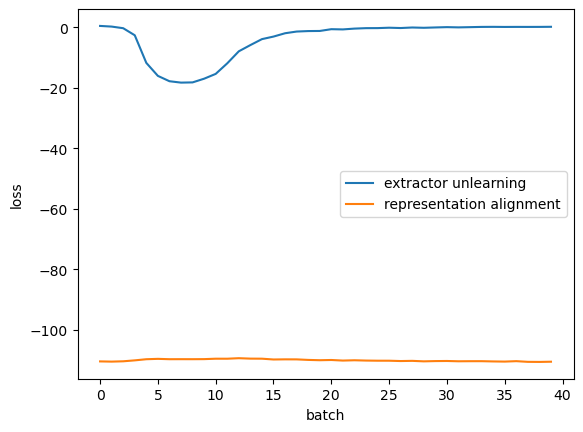

In [13]:
x = range(len(all_loss1_list))
plt.plot(x,all_loss1_list,label = 'extractor unlearning')
plt.plot(x,all_loss2_list,label = 'representation alignment')
plt.xlabel('batch')
plt.ylabel('loss')
plt.legend()

In [14]:
attack_model = Train.train_attack_model(unlearn_model, loaders['sample'], loaders['test'])
            
asr = Train.attack(unlearn_model, attack_model, loaders['unlearn'], loaders['test'])
acc_re_tr = Train.test(unlearn_model, loaders['remain'])
acc_fr_tr = Train.test(unlearn_model, loaders['unlearn'])
acc_ts = Train.test(unlearn_model, loaders['test'])
acc_re_ts = Train.test(unlearn_model, loaders['test'], REMAIN_LABEL)
acc_fr_ts = Train.test(unlearn_model, loaders['test'], UNLEARN_LABEL)

print('Unlearn remaining training acc is ', acc_re_tr)
print('Unlearn forgetting training acc is ', acc_fr_tr)
print('Unlearn test acc is ', acc_ts)
print('Unlearn remaining test acc is ', acc_re_ts)
print('Unlearn forgetting test acc is ', acc_fr_ts)
print('Attack Success Rate is ', asr)
print('Algorithm Time is ', unlearn_time)

5000
5024
MIA attacker training accuracy = 0.8811
MIA Attacker accuracy = 0.4761
Unlearn remaining training acc is  75.79777777777778
Unlearn forgetting training acc is  7.18
Unlearn test acc is  72.63
Unlearn remaining test acc is  80.47777777777777
Unlearn forgetting test acc is  2.0
Attack Success Rate is  0.4761427425821973
Algorithm Time is  1399.774664402008
